# pytorch 基础知识

## 神经网络层管理工具`nn.ModuleList` 和 `nn.Sequential`

https://blog.51cto.com/u_13977270/3398081

`nn.ModuleList` 和 `nn.Sequential` 都是 PyTorch 中用于管理神经网络层的工具，但是它们之间存在一些关键区别。下面我将通过具体的例子来说明这两种工具的不同之处。

### 示例代码

#### 使用 `nn.Sequential`

首先，我们来看一下使用 `nn.Sequential` 的例子：

```python
import torch
import torch.nn as nn

class SequentialModel(nn.Module):
    def __init__(self, in_features=10, out_features=2):
        super(SequentialModel, self).__init__()
        # 使用Sequential来定义网络层
        self.model = nn.Sequential(
            nn.Linear(in_features, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 30, bias=True),
            nn.ReLU(),
            nn.Linear(30, out_features, bias=True)
        )

    def forward(self, x):
        return self.model(x)

# 实例化模型
seq_model = SequentialModel()
print(seq_model)
```

#### 使用 `nn.ModuleList`

接着，我们来看一下使用 `nn.ModuleList` 的例子：

```python
class ModuleListModel(nn.Module):
    def __init__(self, in_features=10, out_features=2):
        super(ModuleListModel, self).__init__()
        # 使用ModuleList来定义网络层
        self.layers = nn.ModuleList([
            nn.Linear(in_features, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 30, bias=True),
            nn.ReLU(),
            nn.Linear(30, out_features, bias=True)
        ])

    def forward(self, x):
        # 依次通过每一层进行前向传播
        for layer in self.layers:
            x = layer(x)
        return x

# 实例化模型
module_list_model = ModuleListModel()
print(module_list_model)
```

### 区别总结

1. **前向传播**：
   - `nn.Sequential`：前向传播时，只需要将输入传递给 `model`，剩下的工作（按顺序应用每一层）将自动完成。
   - `nn.ModuleList`：需要显式地遍历每一层，并手动调用每一层的前向传播方法。

2. **灵活性**：
   - `nn.Sequential`：适用于结构相对固定、顺序明确的网络。
   - `nn.ModuleList`：更适合需要动态构建或修改网络的情况，如条件分支、循环等。

### 示例运行结果

当你运行上述代码时，你会看到两个模型的定义略有不同：

- 使用 `nn.Sequential` 的模型看起来像是一个固定的顺序容器。
- 使用 `nn.ModuleList` 的模型则更像是一个可以自由操作的列表。

根据你的具体需求，你可以选择最适合的方式来定义你的模型。如果你的模型结构非常规整并且不需要频繁改动，那么 `nn.Sequential` 会更加方便；如果你需要更高的灵活性，那么 `nn.ModuleList` 会是更好的选择。

In [34]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 生成一个随机4,3的张量
x=torch.rand(4,3)
print(x)

tensor([[0.3403, 0.8266, 0.9849],
        [0.0031, 0.8972, 0.1040],
        [0.6214, 0.7369, 0.9363],
        [0.6827, 0.2049, 0.8847]])


In [3]:
model_s = nn.Sequential(
            nn.Linear(3, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 30, bias=True),
            nn.ReLU(),
            nn.Linear(30, 1, bias=True)
        )

In [4]:
model_s(x)

tensor([[-0.0546],
        [-0.0128],
        [-0.0905],
        [-0.1036]], grad_fn=<AddmmBackward0>)

In [8]:
model_m = nn.ModuleList([
    nn.Linear(3, 100, bias=True),
    nn.ReLU(),
    nn.Linear(100, 30, bias=True),
    nn.ReLU(),
    nn.Linear(30, 1, bias=True)
])

In [15]:
out=model_m[0](x)
out=model_m[1](out)
out=model_m[2](out)

In [17]:
model_l = [
    nn.Linear(3, 100, bias=True),
    nn.ReLU(),
    nn.Linear(100, 30, bias=True),
    nn.ReLU(),
    nn.Linear(30, 1, bias=True)
]

In [18]:
out=model_l[0](x)
out=model_l[1](out)
out=model_l[2](out)

In [19]:
model_m.parameters

<bound method Module.parameters of ModuleList(
  (0): Linear(in_features=3, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=1, bias=True)
)>

### classwork 1

* 把下面神经网络改为通过`nn.ModuleList`和`nn.Sequential`来构建，并完成训练

In [3]:


class Model0(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super(Model0,self).__init__()
        self.h1=nn.Linear(in_features,100,bias=True)
        self.h2=nn.Linear(100,30,bias=True)
        self.out=nn.Linear(30,out_features,bias=True)

    def forward(self, x):
        h1_out=self.h1(x)
        h1_out_r=torch.relu(h1_out)
        h2_out=self.h2(h1_out_r)
        h2_out_r=torch.relu(h2_out)
        out_out=self.out(h2_out_r)
        return out_out

In [6]:
class ModelSequential(nn.Module):
    def __init__(self, in_features=10, out_features=2):
        super(ModelSequential, self).__init__()
        # 定义每一层及其激活函数
        self.model = nn.Sequential(
            nn.Linear(in_features, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 30, bias=True),
            nn.ReLU(),
            nn.Linear(30, out_features, bias=True)
        )

    def forward(self, x):
        # 由于所有的层和激活函数都已经被封装在Sequential中，
        # 因此这里的forward只需要直接传递输入即可。
        return self.model(x)

In [9]:
import torch
import torch.nn as nn

class ModelModuleList(nn.Module):
    def __init__(self, in_features=10, out_features=2):
        super(ModelModuleList, self).__init__()
        # 使用ModuleList来存储网络层
        self.layers = nn.ModuleList([
            nn.Linear(in_features, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 30, bias=True),
            nn.ReLU(),
            nn.Linear(30, out_features, bias=True)
        ])

    def forward(self, x):
        # 依次通过每一层进行前向传播
        for layer in self.layers:
            x = layer(x)
        return x

In [10]:
lr=0.1
gamma=0.5
epochs=5

torch.manual_seed(40)
x = torch.rand((500,20),dtype=torch.float32)
y = torch.randint(low=0,high=2,size=(500,1),dtype=torch.float32)
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=50) 

net=ModelModuleList(20,1)
#print(output)
criterion = nn.BCEWithLogitsLoss()
#criterion = nn.MSELoss()
opt=optim.SGD(net.parameters() , lr=lr , momentum = gamma)

for i in range(epochs):
    for x1,y1 in dataloader:
        output=net.forward(x1)
        loss = criterion(output,y1)#在PyTorch中,有些情况下目标向量(target)需要使用.long()方法转换为长整型tensor(long tensor),
        opt.zero_grad()
        loss.backward()
        opt.step()
        print(loss)

tensor(0.6942, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6914, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6977, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6939, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6951, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6891, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6935, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6946, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6937, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7000, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6949, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6898, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6940, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6954, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6874, grad_fn=<BinaryCrossEntro

### 张量的连续性、contiguous函数

https://blog.csdn.net/m0_48241022/article/details/132804698

在pytorch中，tensor的实际数据以一维数组（storage）的形式存储于某个连续的内存中，以“行优先”进行存储
 tensor连续（contiguous）是指tensor的storage元素排列顺序与其按行优先时的元素排列顺序相同


 tensor不连续会导致某些操作无法进行，比如view()就无法进行。在上面的例子中：由于 b 是不连续的，所以对其进行view()操作会报错；b.view(3,3)没报错，因为b本身的shape就是(3,3)。

  tensor.contiguous()返回一个与原始tensor有相同元素的 “连续”tensor，如果原始tensor本身就是连续的，则返回原始tensor。

In [22]:
from IPython.display import Image
Image(url= "37.png")

In [28]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
print(a)
print(a.storage())
print(a.is_contiguous())  # a是连续的

 
b = a.t()  # b是a的转置
print(b)
print(b.storage())
print(b.is_contiguous())  # b是不连续的

#让张量变连续
c = b.contiguous()
print(c.is_contiguous())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
 1
 2
 3
 4
 5
 6
 7
 8
 9
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 9]
True
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
 1
 2
 3
 4
 5
 6
 7
 8
 9
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 9]
False
True


## 常用的张量维度变换函数

### `view()`

`view()` 函数可以用来重塑张量，使其具有新的形状。新形状必须与原始张量的元素数量相匹配。

In [29]:
x = torch.randn(4, 3)
print("Original Tensor:")
print(x)

reshaped_x = x.view(-1, 2)  # 使用-1自动推断该维度大小
print("\nReshaped Tensor using view():")
print(reshaped_x)

# 注意事项：使用 view() 时，新形状的总元素数必须与原张量相同。

Original Tensor:
tensor([[ 0.4461,  0.6512,  1.4922],
        [ 1.9560,  0.8955,  0.1616],
        [ 1.0333, -0.5607,  1.2151],
        [ 0.9077, -0.2138,  1.4773]])

Reshaped Tensor using view():
tensor([[ 0.4461,  0.6512],
        [ 1.4922,  1.9560],
        [ 0.8955,  0.1616],
        [ 1.0333, -0.5607],
        [ 1.2151,  0.9077],
        [-0.2138,  1.4773]])


In [27]:
y = torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32)
#y

In [28]:
#y.view(-1)

### `transpose()` / `t()`

`transpose()` 函数用于交换两个维度，而 `t()` 是 `transpose(0, 1)` 的简写，用于交换两个相邻的维度。

In [31]:
transposed_x = x.transpose(0, 1)  # 交换第一个和第二个维度
print(transposed_x)

transposed_x_t = x.t()  # 只适用于二维张量
print(transposed_x_t)

tensor([[ 0.4461,  1.9560,  1.0333,  0.9077],
        [ 0.6512,  0.8955, -0.5607, -0.2138],
        [ 1.4922,  0.1616,  1.2151,  1.4773]])
tensor([[ 0.4461,  1.9560,  1.0333,  0.9077],
        [ 0.6512,  0.8955, -0.5607, -0.2138],
        [ 1.4922,  0.1616,  1.2151,  1.4773]])


### `unsqueeze()` 与 `squeeze()`

`unsqueeze()` 函数用于在张量中增加一个新的维度（即增加一个轴）。

`squeeze()` 函数用于删除单维度条目（即大小为1的维度）。

In [34]:
unsqueezed_x = x.unsqueeze(0)  # 在第一个维度增加一个轴
print(unsqueezed_x)
print(unsqueezed_x.shape)
# 注意事项：可以在任何位置增加新的维度，但增加的维度大小始终为1。

tensor([[[ 0.4461,  0.6512,  1.4922],
         [ 1.9560,  0.8955,  0.1616],
         [ 1.0333, -0.5607,  1.2151],
         [ 0.9077, -0.2138,  1.4773]]])
torch.Size([1, 4, 3])


In [35]:
squeezed_x = unsqueezed_x.squeeze(0)  # 删除第一个维度
print(squeezed_x)
print(squeezed_x.shape)

# 注意事项：可以指定某个维度删除，如果不指定，则删除所有大小为1的维度。

tensor([[ 0.4461,  0.6512,  1.4922],
        [ 1.9560,  0.8955,  0.1616],
        [ 1.0333, -0.5607,  1.2151],
        [ 0.9077, -0.2138,  1.4773]])
torch.Size([4, 3])


In [25]:
y.shape

torch.Size([500, 1])

In [26]:
y.squeeze(1)

tensor([2., 2., 1., 2., 0., 0., 1., 2., 1., 1., 2., 1., 2., 0., 1., 0., 0., 2.,
        0., 2., 1., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 0., 1.,
        1., 0., 2., 1., 1., 1., 2., 0., 0., 1., 1., 0., 0., 0., 2., 2., 1., 0.,
        1., 1., 2., 0., 0., 1., 0., 2., 2., 2., 0., 0., 0., 1., 2., 2., 2., 2.,
        2., 2., 0., 2., 2., 2., 1., 1., 0., 0., 2., 2., 2., 2., 2., 1., 2., 1.,
        2., 0., 2., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 2., 2., 0., 0., 0.,
        1., 0., 2., 0., 1., 1., 2., 0., 2., 1., 1., 0., 2., 2., 2., 2., 0., 0.,
        2., 2., 1., 0., 0., 2., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 0., 2., 1., 2., 2., 1., 0., 0., 1., 1., 0., 1., 2., 0., 2., 2.,
        0., 2., 1., 0., 1., 2., 2., 2., 1., 1., 0., 2., 1., 2., 0., 2., 0., 2.,
        0., 0., 0., 0., 2., 2., 1., 1., 2., 0., 2., 0., 2., 1., 0., 2., 1., 2.,
        1., 1., 0., 2., 1., 1., 2., 0., 0., 1., 1., 0., 1., 2., 0., 2., 2., 0.,
        0., 0., 1., 0., 0., 2., 1., 0., 

## PyTorch 矩阵乘法运算

### 1. `torch.mv`
`torch.mv` 用于计算一个二维矩阵与一个一维向量之间的乘法。它返回一个一维向量，表示矩阵与向量的乘积。

### 2. `torch.mm(A, B)`

`torch.mm` 是用于两个二维矩阵之间的乘法。它要求两个输入张量都是二维的，并且第一个张量的列数必须等于第二个张量的行数。

### 3. `torch.matmul(A, B)`

`torch.matmul` 是一个通用的矩阵乘法函数，可以处理多种情况下的乘法运算。它可以处理任意维度的张量，并且支持广播。

### 4. `torch.bmm(A, B)`

`torch.bmm` 代表 batch matrix multiplication，用于批量矩阵乘法。它要求输入张量至少是三维的，并且第三维度是矩阵的维度。`bmm` 会对输入张量的第一个维度进行批量处理。



In [42]:
A = torch.randn(3, 4)  
v = torch.randn(4)     
w = torch.mv(A, v)
print(w)

tensor([ 3.0223,  3.9720, -1.8390])


In [37]:
A = torch.randn(3, 4)
B = torch.randn(4, 2)
print(A)
print(B)
C = torch.mm(A, B)
print(C)

tensor([[ 1.1880, -0.6561, -1.5751,  0.2108],
        [ 0.3523, -1.2360,  1.5743,  0.2807],
        [ 1.2113,  0.1812, -0.1775, -2.0566]])
tensor([[-0.9722, -0.6501],
        [-0.1712, -0.0815],
        [ 0.2665,  0.4672],
        [-0.8539,  0.3143]])
tensor([[-1.6425, -1.3884],
        [ 0.0491,  0.6954],
        [ 0.5002, -1.5315]])


In [38]:
A = torch.randn(3, 4)
B = torch.randn(4, 2)
C = torch.matmul(A, B)
print(C)
# 三维张量与二维张量相乘
A = torch.randn(2, 3, 4)
B = torch.randn(4, 2)
C = torch.matmul(A, B)
print(C)

tensor([[ 0.9237, -0.2760],
        [ 0.9740,  0.5352],
        [-0.9706,  2.0148]])
tensor([[[-0.5651,  0.4980],
         [ 1.2478,  0.7032],
         [-1.2116, -0.7601]],

        [[ 1.0463,  1.6109],
         [ 2.3260, -0.1103],
         [ 1.7420, -2.7521]]])


In [40]:
A = torch.randn(10, 3, 4)
B = torch.randn(10, 4, 2)
C = torch.bmm(A, B)
print(C.shape)
print(C)

torch.Size([10, 3, 2])
tensor([[[-0.2231,  0.0683],
         [-1.2908, -0.9820],
         [ 2.2060,  1.0636]],

        [[-0.3593,  3.2191],
         [ 1.4395, -0.6196],
         [-1.7015,  3.2343]],

        [[ 1.2474, -2.7916],
         [ 0.5665,  0.1046],
         [-0.7204, -0.9899]],

        [[-0.7077,  0.0126],
         [ 0.4887,  1.5367],
         [-0.2416,  0.9642]],

        [[ 2.7211, -1.0547],
         [-1.4047, -2.7027],
         [ 0.8932, -2.7055]],

        [[-0.3736,  0.9176],
         [-0.9204, -3.9566],
         [-2.6899,  8.6097]],

        [[ 1.9016, -0.3787],
         [-1.7463, -0.4884],
         [-3.5153, -1.8062]],

        [[ 1.0823,  1.2633],
         [-0.5543,  1.1416],
         [-1.4252, -1.1803]],

        [[ 0.0366,  0.2722],
         [ 2.2542,  3.4856],
         [-1.1687, -0.4482]],

        [[ 3.3335, -1.6299],
         [ 0.7488,  1.5366],
         [ 0.9774, -0.8057]]])


In [37]:
import torch.nn.functional as F
import math
from torch.autograd import Variable
import copy

In [38]:
#词嵌入
class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
    # d_model:词嵌入维度
    # vocab:字典大小
        super(Embeddings, self).__init__()
        self.lut = nn.Embedding(vocab, d_model)
        self.d_model = d_model
    def forward(self, x):
        return self.lut(x) * math.sqrt(self.d_model)


In [39]:
d_model = 512  # embedding_size
vocab = 1000  # 词典大小
x=torch.tensor([[100, 2, 421, 508], [491, 998, 1, 221]], dtype=torch.long)
emb = Embeddings(d_model, vocab)
embr = emb(x)
print(embr.shape)

torch.Size([2, 4, 512])


# 位置编码

以前的方法-表格型

* 方法一：使用[0,1]范围分配

这个方法的分配方式是，将0-1这个范围的，将第一个token分配0，最后一个token分配去1，其余的token按照文章的长度平均分配。具体形式如下：

我喜欢吃洋葱 【0 0.16 0.32.....1】

我真的不喜欢吃洋葱【0 0.125 0.25.....1】

问题：我们可以看到，如果句子长度不同，那么位置编码是不一样，所以无法表示句子之间有什么相似性。

* 方法二：1-n正整数范围分配

这个方法比较直观，就是按照输入的顺序，一次分配给token所在的索引位置。具体形式如下：

我喜欢吃洋葱 【1，2，3，4，5，6】

我真的不喜欢吃洋葱【1，2，3，4，5，6，7】

问题：往往句子越长，后面的值越大，数字越大说明这个位置占的权重也越大，这样的方式无法凸显每个位置的真实的权重。

https://erdem.pl/2021/05/understanding-positional-encoding-in-transformers

https://www.cnblogs.com/yanshw/p/16740972.html

https://www.cnblogs.com/ghj1976/p/li-jietransformer-de-wei-zhi-bian-ma.html

https://blog.csdn.net/Kaiyuan_sjtu/article/details/119621613

In [24]:
Image(url= "31.jpg",width=800)

In [23]:
Image(url= "32.jpg",width=800)

### Transformer算法中的位置编码与其他方法的比较（chatgpt）

Transformer算法中的位置编码(Positional Encoding)与RNN、LSTM处理顺序信息的方法具有以下优缺点:

**位置编码的优点:**

- 计算效率高,可以完全并行
- 为模型带来一定位置不变性,对小的位置变化更鲁棒
- 使用周期函数,使模型更好地学习位置信息
- 避免位置信息过于绝对化
- 较RNN和LSTM更简单,只编码位置信息

**位置编码的缺点:**

- 需要设置最大序列长度,长度过长会导致计算复杂度提升
- 仅编码相对位置,无法表示绝对位置
- 对语序变化不如RNN等顺序敏感
- 需搭配注意力机制,单独使用效果较弱

**RNN和LSTM的优点:** 

- 可以表示绝对位置信息
- 对语序变化更敏感
- LSTM可以捕捉长程依赖关系

**RNN和LSTM的缺点:**

- 计算复杂度高,无法并行计算
- 对位置信息过于敏感
- 隐状态编码了所有历史,计算资源利用率低

总之,位置编码更高效并具有一定位置鲁棒性,但RNN和LSTM可以建模绝对位置并对语序更敏感。两者互补的特点可根据任务需求进行选择。

In [29]:
#np.zeros(shape=(60,4))

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  7.61720408e-01 ...  9.99999991e-01
   1.15478198e-04  9.99999993e-01]
 [ 9.09297427e-01 -4.16146837e-01  9.87046251e-01 ...  9.99999964e-01
   2.30956395e-04  9.99999973e-01]
 ...
 [ 1.23573123e-01 -9.92335469e-01  1.39920673e-01 ...  9.99980359e-01
   5.42744868e-03  9.99985271e-01]
 [-7.68254661e-01 -6.40144339e-01 -6.63571724e-01 ...  9.99979514e-01
   5.54292514e-03  9.99984638e-01]
 [-9.53752653e-01  3.00592544e-01 -9.99784705e-01 ...  9.99978652e-01
   5.65840153e-03  9.99983991e-01]]


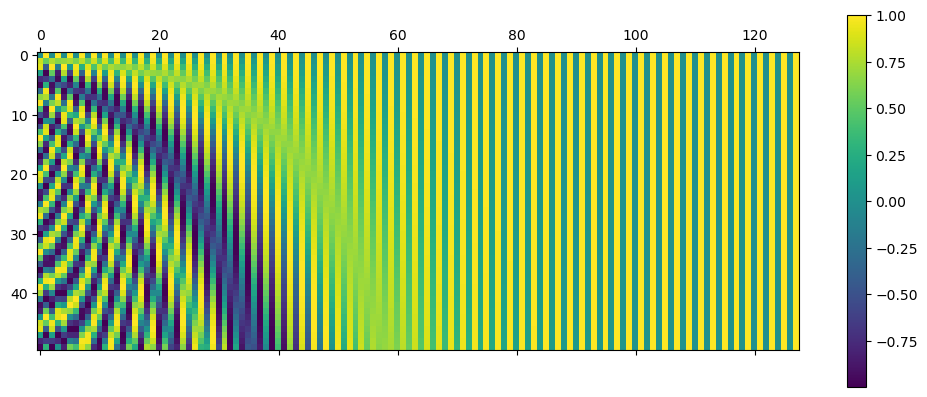

In [35]:
def getPositionEncoding(seq_len,dim,n=10000):
  PE = np.zeros(shape=(seq_len,dim))
  for pos in range(seq_len):
    for i in range(int(dim/2)):
      denominator = np.power(n, 2*i/dim)
      PE[pos,2*i] = np.sin(pos/denominator)
      PE[pos,2*i+1] = np.cos(pos/denominator)

  return PE

PE = getPositionEncoding(seq_len=50, dim=128, n=10000)
print(PE)

caxes = plt.matshow(PE,interpolation ='nearest')
plot.colorbar(caxes) 
plot.show()

## transformer 中的位置编码的使用

https://blog.csdn.net/qq_52785473/article/details/124537101

* register_buffer(self, name, tensor)是一个PyTorch中的方法，它的作用是向模块（module）中添加一个持久的缓冲区（buffer）缓冲区是一种不被视为模型参数（model parameter）的张量（tensor），它不会在训练过程中更新梯度（gradient），但是会作为模块的状态（state）被保存和迁移

### classwork2

* 已知如下类，通过给定的x运行下面的词嵌入类和位置编码类，并打印结果张量及其维度

In [54]:
#词嵌入
class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
    # d_model:词嵌入维度
    # vocab:字典大小
        super(Embeddings, self).__init__()
        self.lut = nn.Embedding(vocab, d_model)
        self.d_model = d_model
    def forward(self, x):
        return self.lut(x) * math.sqrt(self.d_model)

In [55]:
d_model = 512  # embedding_size
vocab = 1000  # 词典大小
x=torch.tensor([[100, 2, 421, 508], [491, 998, 1, 221]], dtype=torch.long)
emb = Embeddings(d_model, vocab)
embr = emb(x)
print(embr.shape)

torch.Size([2, 4, 512])


In [60]:
#位置编码
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout, max_len=5000):
    # d_model:词嵌入维度
    # dropout:置零比率
    # max_len:每个句子最大的长度
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0,  max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(1000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

In [61]:
dropout = 0.1
max_len = 60
pe = PositionalEncoding(d_model, dropout, max_len)
pe_result = pe(embr)
print(pe_result.shape)

torch.Size([2, 4, 512])


In [63]:
pe.state_dict()

OrderedDict([('pe',
              tensor([[[ 0.0000,  1.0000,  0.0000,  ...,  1.0000,  0.0000,  1.0000],
                       [ 0.8415,  0.5403,  0.8268,  ...,  1.0000,  0.0010,  1.0000],
                       [ 0.9093, -0.4161,  0.9302,  ...,  1.0000,  0.0021,  1.0000],
                       ...,
                       [ 0.4362,  0.8999, -0.8753,  ...,  0.9982,  0.0585,  0.9983],
                       [ 0.9929,  0.1192, -0.0926,  ...,  0.9981,  0.0596,  0.9982],
                       [ 0.6367, -0.7711,  0.7711,  ...,  0.9981,  0.0606,  0.9982]]]))])

## 自注意力机制代码

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SelfAttention, self).__init__()
        self.query = nn.Linear(input_size, hidden_size)
        self.key = nn.Linear(input_size, hidden_size)
        self.value = nn.Linear(input_size, hidden_size)

    def forward(self, x):
        # 计算Q、K、V
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)
        # 计算自注意力矩阵
        attn_weights = torch.bmm(q, k.transpose(1, 2))
        attn_weights = F.softmax(attn_weights, dim=-1)
        # 使用自注意力矩阵对V进行加权平均
        attn_output = torch.bmm(attn_weights, v)
        return attn_output


In [20]:
#上面自注意机制网络，请编程生成一个简单的数据集，并使用这个网络进行前向传播
x = torch.randn(10, 20, 30)
model = SelfAttention(30, 40)
output = model(x)
output

tensor([[[ 8.3025e-01,  7.7278e-01,  7.3960e-01,  ..., -3.1352e-01,
           1.7342e-01, -7.2156e-01],
         [-5.2339e-02,  2.8183e-01,  2.1247e-01,  ..., -3.9275e-01,
           1.1995e-01,  5.8236e-01],
         [ 2.7860e-01,  4.8669e-01,  1.6767e-01,  ...,  3.8547e-01,
          -6.0063e-01, -2.1536e-01],
         ...,
         [ 1.3347e-01,  2.2957e-01, -4.2782e-02,  ...,  2.3184e-01,
          -1.3142e-01, -5.2254e-02],
         [-1.3501e-02,  1.0049e-01,  1.2684e-01,  ...,  2.7119e-01,
          -1.9974e-01,  1.4608e-01],
         [-2.8918e-02, -3.0294e-01, -1.6875e-01,  ...,  7.6529e-02,
           5.7324e-02, -6.7287e-01]],

        [[-9.5269e-02, -1.7231e-02, -7.3497e-01,  ..., -6.3840e-01,
          -2.0553e-01, -3.1382e-02],
         [ 3.8260e-01,  7.8272e-01,  2.7927e-01,  ...,  1.1539e-01,
          -5.8368e-01,  6.6879e-01],
         [ 3.1963e-01, -6.7354e-01, -4.7888e-02,  ...,  1.3886e-01,
          -5.6695e-01,  4.7908e-01],
         ...,
         [ 4.8869e-01, -4

: 